# 粒子群算法    
    
$x_{i}=(x_{i1}, x_{i2},...x_{in})$  第i个粒子的位置向量	        
$v_{i}=(v_{i1}, v_{i2},...x_{in})$	第i个粒子的速度向量		            
迭代：	        
$v_{i}^{t+1}=wv_{i}^{t}+c_{1}r_{1}(pbest_{i}-x_{i})+c_{2}r_{2}(Gbest-x_{i})$            
$x_{i}^{t+1} = x_{i}^{t}+v_{i}^{t+1}$	
$pbest_{i}^{t+1}$为粒子i的历史最佳，Gbest为整个群体的历史最佳	        
w多采用线性递减权值策略：	        
$w=w_{max}-\frac{(w_{max}-w_{min})t}{T_{max}}$	        

最优值是：0.00000
最优解是: [-1.54094027e-05 -2.52986039e-05]


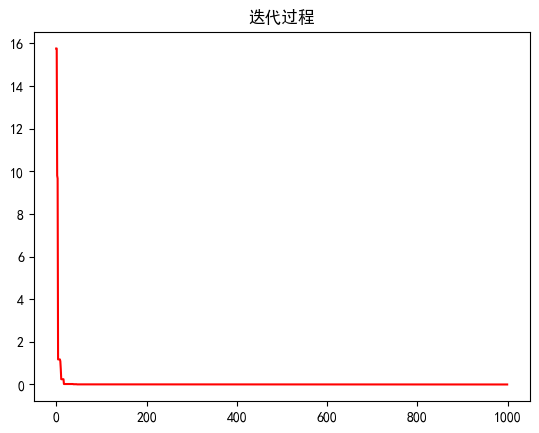

In [5]:
# 速度
# Vi+1 = w*Vi + c1 * r1 * (pbest_i - Xi) + c2 * r2 * (gbest_i - Xi)
# 位置
# Xi+1 = Xi + Vi+1
# vi, xi 分别表示粒子第i维的速度和位置
# pbest_i, gbest_i 分别表示某个粒子最好位置第i维的值、整个种群最好位置第i维的值

import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

mpl.rcParams['font.sans-serif'] = ['SimHei']  # 指定默认字体
mpl.rcParams['axes.unicode_minus'] = False  # 解决保存图像是负号'-'显示为方块的问题

def fitness_func(X):
    """计算粒子的的适应度值，也就是目标函数值，X 的维度是 size * 2 """
    A = 10
    pi = np.pi
    x = X[:, 0]
    y = X[:, 1]
    return 2 * A + x ** 2 - A * np.cos(2 * pi * x) + y ** 2 - A * np.cos(2 * pi * y)

def velocity_update(V, X, pbest, gbest, c1, c2, w, max_val):
    """
    根据速度更新公式更新每个粒子的速度
    :param V: 粒子当前的速度矩阵，20*2 的矩阵
    :param X: 粒子当前的位置矩阵，20*2 的矩阵
    :param pbest: 每个粒子历史最优位置，20*2 的矩阵
    :param gbest: 种群历史最优位置，1*2 的矩阵
    """
    size = X.shape[0]
    r1 = np.random.random((size, 1))
    r2 = np.random.random((size, 1))
    V = w * V + c1 * r1 * (pbest - X) + c2 * r2 * (gbest - X)  # 直接对照公式写就好了
    # 防止越界处理
    V[V < -max_val] = -max_val
    V[V > max_val] = max_val
    return V

def position_update(X, V):
    """
    根据公式更新粒子的位置
    :param X: 粒子当前的位置矩阵，维度是 20*2
    :param V: 粒子当前的速度举着，维度是 20*2
    """
    return X + V

def pso():
    # PSO的参数
    w = 1  # 惯性因子，一般取1
    c1 = 2  # 学习因子，一般取2
    c2 = 2  #
    r1 = None  # 为两个（0,1）之间的随机数
    r2 = None
    dim = 2  # 维度的维度
    size = 20  # 种群大小，即种群中小鸟的个数
    iter_num = 1000  # 算法最大迭代次数
    max_val = 0.5  # 限制粒子的最大速度为0.5
    best_fitness = float(9e10)  # 初始的适应度值，在迭代过程中不断减小这个值
    fitneess_value_list = []  # 记录每次迭代过程中的种群适应度值变化
    # 初始化种群的各个粒子的位置
    # 用一个 20*2 的矩阵表示种群，每行表示一个粒子
    X = np.random.uniform(-5, 5, size=(size, dim))
    # 初始化种群的各个粒子的速度
    V = np.random.uniform(-0.5, 0.5, size=(size, dim))
    # 计算种群各个粒子的初始适应度值
    p_fitness = fitness_func(X)
    # 计算种群的初始最优适应度值
    g_fitness = p_fitness.min()
    # 讲添加到记录中
    fitneess_value_list.append(g_fitness)
    # 初始的个体最优位置和种群最优位置
    pbest = X
    gbest = X[p_fitness.argmin()]
    # 接下来就是不断迭代了
    for i in range(1, iter_num):
        V = velocity_update(V, X, pbest, gbest, c1, c2, w, max_val)  # 更新速度
        X = position_update(X, V)  # 更新位置
        p_fitness2 = fitness_func(X)  # 计算各个粒子的适应度
        g_fitness2 = p_fitness2.min()  # 计算群体的最优适应度
        # 更新每个粒子的历史最优位置
        for j in range(size):
            if p_fitness[j] > p_fitness2[j]:
                pbest[j] = X[j]
                p_fitness[j] = p_fitness2[j]
        # 更新群体的最优位置
        if g_fitness > g_fitness2:
            gbest = X[p_fitness2.argmin()]
            g_fitness = g_fitness2
        # 记录最优迭代结果
        fitneess_value_list.append(g_fitness)
        # 迭代次数+1
        i += 1

    # 打印迭代的结果
    print("最优值是：%.5f" % fitneess_value_list[-1])
    print("最优解是:", gbest)
    # 最优值是：0.00000
    # 最优解是：x=0.00000, y=-0.00000

    # 绘图
    plt.plot(fitneess_value_list, color='r')
    plt.title('迭代过程')
pso()


# 带约束
$F(x) =f(x)+h(k)H(x) $          
$h(k) =\sqrt{k}\mathrm{~or~}k\sqrt{k}  $            
$H(x) =\sum_{i=1}^m\theta(q_i(x))q_i(x_i)^{\gamma(q_i(x_i))} $          
$f( x) : $是原来的目标函数              
$h( x) : $动态更新的惩罚系数，与迭代次数相关。通常可使用$k\sqrt k$。如果问题规模更小，可以使用 $\sqrt{k}$             
$H(x)\cdot$ 是约束惩罚项$      
$H(x)取max（0， -g_{i}^{x}$         
约定规则
两解都可行，比较目标值，都不可行，比较惩罚值，优先选取可行解

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

mpl.rcParams['font.sans-serif'] = ['SimHei']  # 指定默认字体
mpl.rcParams['axes.unicode_minus'] = False  # 解决保存图像是负号'-'显示为方块的问题

# PSO的参数
w = 1  # 惯性因子，一般取1
c1 = 2  # 学习因子，一般取2
c2 = 2  #
r1 = None  # 为两个（0,1）之间的随机数
r2 = None
dim = 2  # 维度的维度
size = 100  # 种群大小，即种群中小鸟的个数
iter_num = 1000  # 算法最大迭代次数
max_vel = 0.5  # 限制粒子的最大速度为0.5
fitneess_value_list = []  # 记录每次迭代过程中的种群适应度值变化

def calc_f(X):
    """计算粒子的的适应度值，也就是目标函数值，X 的维度是 size * 2 """
    A = 10
    pi = np.pi
    x = X[0]
    y = X[1]
    return 2 * A + x ** 2 - A * np.cos(2 * pi * x) + y ** 2 - A * np.cos(2 * pi * y)

def calc_e1(X):
    """计算第一个约束的惩罚项"""
    e = X[0] + X[1] - 6
    return max(0, e)

def calc_e2(X):
    """计算第二个约束的惩罚项"""
    e = 3 * X[0] - 2 * X[1] - 5
    return max(0, e)

def calc_Lj(e1, e2):
    """根据每个粒子的约束惩罚项计算Lj权重值，e1, e2列向量，表示每个粒子的第1个第2个约束的惩罚项值"""
    # 注意防止分母为零的情况
    if (e1.sum() + e2.sum()) <= 0:
        return 0, 0
    else:
        L1 = e1.sum() / (e1.sum() + e2.sum())
        L2 = e2.sum() / (e1.sum() + e2.sum())
    return L1, L2

def velocity_update(V, X, pbest, gbest):
    """
    根据速度更新公式更新每个粒子的速度
    :param V: 粒子当前的速度矩阵，20*2 的矩阵
    :param X: 粒子当前的位置矩阵，20*2 的矩阵
    :param pbest: 每个粒子历史最优位置，20*2 的矩阵
    :param gbest: 种群历史最优位置，1*2 的矩阵
    """
    r1 = np.random.random((size, 1))
    r2 = np.random.random((size, 1))
    V = w * V + c1 * r1 * (pbest - X) + c2 * r2 * (gbest - X)  # 直接对照公式写就好了
    # 防止越界处理
    V[V < -max_vel] = -max_vel
    V[V > max_vel] = max_vel
    return V

def position_update(X, V):
    """
    根据公式更新粒子的位置
    :param X: 粒子当前的位置矩阵，维度是 20*2
    :param V: 粒子当前的速度举着，维度是 20*2
    """
    return X + V

def update_pbest(pbest, pbest_fitness, pbest_e, xi, xi_fitness, xi_e):
    """
    判断是否需要更新粒子的历史最优位置
    :param pbest: 历史最优位置
    :param pbest_fitness: 历史最优位置对应的适应度值
    :param pbest_e: 历史最优位置对应的约束惩罚项
    :param xi: 当前位置
    :param xi_fitness: 当前位置的适应度函数值
    :param xi_e: 当前位置的约束惩罚项
    :return:
    """
    # 下面的 0.0000001 是考虑到计算机的数值精度位置，值等同于0
    # 规则1，如果 pbest 和 xi 都没有违反约束，则取适应度小的
    if pbest_e <= 0.0000001 and xi_e <= 0.0000001:
        if pbest_fitness <= xi_fitness:
            return pbest, pbest_fitness, pbest_e
        else:
            return xi, xi_fitness, xi_e
    # 规则2，如果当前位置违反约束而历史最优没有违反约束，则取历史最优
    if pbest_e < 0.0000001 and xi_e >= 0.0000001:
        return pbest, pbest_fitness, pbest_e
    # 规则3，如果历史位置违反约束而当前位置没有违反约束，则取当前位置
    if pbest_e >= 0.0000001 and xi_e < 0.0000001:
        return xi, xi_fitness, xi_e
    # 规则4，如果两个都违反约束，则取适应度值小的
    if pbest_fitness <= xi_fitness:
        return pbest, pbest_fitness, pbest_e
    else:
        return xi, xi_fitness, xi_e

def update_gbest(gbest, gbest_fitness, gbest_e, pbest, pbest_fitness, pbest_e):
    """
    更新全局最优位置
    :param gbest: 上一次迭代的全局最优位置
    :param gbest_fitness: 上一次迭代的全局最优位置的适应度值
    :param gbest_e:上一次迭代的全局最优位置的约束惩罚项
    :param pbest:当前迭代种群的最优位置
    :param pbest_fitness:当前迭代的种群的最优位置的适应度值
    :param pbest_e:当前迭代的种群的最优位置的约束惩罚项
    :return:
    """
    # 先对种群，寻找约束惩罚项=0的最优个体，如果每个个体的约束惩罚项都大于0，就找适应度最小的个体
    pbest2 = np.concatenate([pbest, pbest_fitness.reshape(-1, 1), pbest_e.reshape(-1, 1)], axis=1)  # 将几个矩阵拼接成矩阵
    pbest2_1 = pbest2[pbest2[:, -1] <= 0.0000001]  # 找出没有违反约束的个体
    if len(pbest2_1) > 0:
        pbest2_1 = pbest2_1[pbest2_1[:, 2].argsort()]  # 根据适应度值排序
    else:
        pbest2_1 = pbest2[pbest2[:, 2].argsort()]  # 如果所有个体都违反约束，直接找出适应度值最小的
    # 当前迭代的最优个体
    pbesti, pbesti_fitness, pbesti_e = pbest2_1[0, :2], pbest2_1[0, 2], pbest2_1[0, 3]
    # 当前最优和全局最优比较
    # 如果两者都没有约束
    if gbest_e <= 0.0000001 and pbesti_e <= 0.0000001:
        if gbest_fitness < pbesti_fitness:
            return gbest, gbest_fitness, gbest_e
        else:
            return pbesti, pbesti_fitness, pbesti_e
    # 有一个违反约束而另一个没有违反约束
    if gbest_e <= 0.0000001 and pbesti_e > 0.0000001:
        return gbest, gbest_fitness, gbest_e
    if gbest_e > 0.0000001 and pbesti_e <= 0.0000001:
        return pbesti, pbesti_fitness, pbesti_e
    # 如果都违反约束，直接取适应度小的
    if gbest_fitness < pbesti_fitness:
        return gbest, gbest_fitness, gbest_e
    else:
        return pbesti, pbesti_fitness, pbesti_e

# 初始化一个矩阵 info, 记录：
# 1、种群每个粒子的历史最优位置对应的适应度，
# 2、历史最优位置对应的惩罚项，
# 3、当前适应度，
# 4、当前目标函数值，
# 5、约束1惩罚项，
# 6、约束2惩罚项，
# 7、惩罚项的和
# 所以列的维度是7
info = np.zeros((size, 7))

# 初始化种群的各个粒子的位置
# 用一个 20*2 的矩阵表示种群，每行表示一个粒子
X = np.random.uniform(-5, 5, size=(size, dim))

# 初始化种群的各个粒子的速度
V = np.random.uniform(-0.5, 0.5, size=(size, dim))

# 初始化粒子历史最优位置为当当前位置
pbest = X
# 计算每个粒子的适应度
for i in range(size):
    info[i, 3] = calc_f(X[i])  # 目标函数值
    info[i, 4] = calc_e1(X[i])  # 第一个约束的惩罚项
    info[i, 5] = calc_e2(X[i])  # 第二个约束的惩罚项

# 计算惩罚项的权重，及适应度值
L1, L2 = calc_Lj(info[i, 4], info[i, 5])
info[:, 2] = info[:, 3] + L1 * info[:, 4] + L2 * info[:, 5]  # 适应度值
info[:, 6] = L1 * info[:, 4] + L2 * info[:, 5]  # 惩罚项的加权求和

# 历史最优
info[:, 0] = info[:, 2]  # 粒子的历史最优位置对应的适应度值
info[:, 1] = info[:, 6]  # 粒子的历史最优位置对应的惩罚项值

# 全局最优
gbest_i = info[:, 0].argmin()  # 全局最优对应的粒子编号
gbest = X[gbest_i]  # 全局最优粒子的位置
gbest_fitness = info[gbest_i, 0]  # 全局最优位置对应的适应度值
gbest_e = info[gbest_i, 1]  # 全局最优位置对应的惩罚项

# 记录迭代过程的最优适应度值
fitneess_value_list.append(gbest_fitness)
# 接下来开始迭代
for j in range(iter_num):
    # 更新速度
    V = velocity_update(V, X, pbest=pbest, gbest=gbest)
    # 更新位置
    X = position_update(X, V)
    # 计算每个粒子的目标函数和约束惩罚项
    for i in range(size):
        info[i, 3] = calc_f(X[i])  # 目标函数值
        info[i, 4] = calc_e1(X[i])  # 第一个约束的惩罚项
        info[i, 5] = calc_e2(X[i])  # 第二个约束的惩罚项
    # 计算惩罚项的权重，及适应度值
    L1, L2 = calc_Lj(info[i, 4], info[i, 5])
    info[:, 2] = info[:, 3] + L1 * info[:, 4] + L2 * info[:, 5]  # 适应度值
    info[:, 6] = L1 * info[:, 4] + L2 * info[:, 5]  # 惩罚项的加权求和
    # 更新历史最优位置
    for i in range(size):
        pbesti = pbest[i]
        pbest_fitness = info[i, 0]
        pbest_e = info[i, 1]
        xi = X[i]
        xi_fitness = info[i, 2]
        xi_e = info[i, 6]
        # 计算更新个体历史最优
        pbesti, pbest_fitness, pbest_e = \
            update_pbest(pbesti, pbest_fitness, pbest_e, xi, xi_fitness, xi_e)
        pbest[i] = pbesti
        info[i, 0] = pbest_fitness
        info[i, 1] = pbest_e
    # 更新全局最优
    pbest_fitness = info[:, 2]
    pbest_e = info[:, 6]
    gbest, gbest_fitness, gbest_e = \
        update_gbest(gbest, gbest_fitness, gbest_e, pbest, pbest_fitness, pbest_e)
    # 记录当前迭代全局之硬度
    fitneess_value_list.append(gbest_fitness)

# 最后绘制适应度值曲线
print('迭代最优结果是：%.5f' % calc_f(gbest))
print('迭代最优变量是：x=%.5f, y=%.5f' % (gbest[0], gbest[1]))
print('迭代约束惩罚项是：', gbest_e)

# 迭代最优结果是：0.00000
# 迭代最优变量是：x=-0.00001, y=0.00002
# 迭代约束惩罚项是： 0.0
# 从结果看，有多个不同的解的目标函数值是相同的，多测试几次就发现了

# 绘图
plt.plot(fitneess_value_list[: 30], color='r')
plt.title('迭代过程')


# 用粒子群算法求解TSP问题   
$x_{i}=(1, 2, 3, 4, 5)$     
交换子 $s =swapx(i, j)$         
交换序列$ss =[s_{1}, s_{2}]$   
此时，v变为寻找交换序列     

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

sns.set_style("whitegrid")
mpl.rcParams['font.sans-serif'] = ['SimHei']  # 指定默认字体
mpl.rcParams['axes.unicode_minus'] = False  # 解决保存图像是负号'-'显示为方块的问题

# 固定随机数种子
np.random.seed(1234)

# 一些参数
city_num = 10  # 城市的数量
size = 50  # 种群大小，即粒子的个数
r1 = 0.7  # pbest-xi 的保留概率
r2 = 0.8  # gbest-xi 的保留概率
iter_num = 1000  # 算法最大迭代次数
fitneess_value_list = []  # 每一步迭代的最优解

X = np.random.choice(list(range(1, 100)), size=city_num, replace=False)
Y = np.random.choice(list(range(1, 100)), size=city_num, replace=False)

def calculate_distance(X, Y):
    distance_matrix = np.zeros((city_num, city_num))
        for i in range(city_num):
        for j in range(city_num):
            if i == j:
                continue
            dis = np.sqrt((X[i] - X[j]) ** 2 + (Y[i] - Y[j]) ** 2)  # 欧式距离计算
            distance_matrix[i][j] = dis
    return distance_matrix

def fitness_func(distance_matrix, xi):
    """
    适应度函数，计算目标函数值.
    :param distance: 城市的距离矩阵
    :param xi: PSO的一个解
    :return: 目标函数值，即总距离
    """
    total_distance = 0
    for i in range(1, city_num):
        start = xi[i - 1]
        end = xi[i]
        total_distance += distance_matrix[start][end]
    total_distance += distance_matrix[end][xi[0]]  # 从最后一个城市回到出发城市
    return total_distance

def plot_tsp(gbest):
    """绘制最优解的图形"""
    plt.scatter(X, Y, color='r')
    for i in range(1, city_num):
        start_x, start_y = X[gbest[i - 1]], Y[gbest[i - 1]]
        end_x, end_y = X[gbest[i]], Y[gbest[i]]
        plt.plot([start_x, end_x], [start_y, end_y], color='b', alpha=0.8)
    start_x, start_y = X[gbest[0]], Y[gbest[0]]
    plt.plot([start_x, end_x], [start_y, end_y], color='b', alpha=0.8)
def get_ss(xbest, xi, r):
    """
    计算交换序列，即 x2 经过交换序列ss得到x1，对应PSO速度更新公式的：
    r1(pbest-xi) 和 r2(gbest-xi)
    :param xbest: pbest 或者 gbest
    :param xi: 例子当前解
    :return:
    """
    velocity_ss = []
    for i in range(len(xi)):
        if xi[i] != xbest[i]:
            j = np.where(xi == xbest[i])[0][0]
            so = (i, j, r)  # 得到交换子
            velocity_ss.append(so)
            xi[i], xi[j] = xi[j], xi[i]  # 执行交换操作
    return velocity_ss

def do_ss(xi, ss):
    """
    执行交换操作
    :param xi:
    :param ss: 由交换子组成的交换序列
    :return:
    """
    for i, j, r in ss:
        rand = np.random.random()
        if rand <= r:
            xi[i], xi[j] = xi[j], xi[i]
    return xi

# 计算城市之间的距离矩阵
distance_matrix = calculate_distance(X, Y)

# 初始化种群的各个粒子的位置，作为个体的历史最优解pbest
# 用一个 50*10 的矩阵表示种群，每行表示一个粒子, 每一行是0-9不重复随机数，表示城市访问的顺序
XX = np.zeros((size, city_num), dtype=np.int)
for i in range(size):
    XX[i] = np.random.choice(list(range(city_num)), size=city_num, replace=False)

# 计算每个粒子对应适应度
pbest = XX
pbest_fitness = np.zeros((size, 1))
for i in range(size):
    pbest_fitness[i] = fitness_func(distance_matrix, xi=XX[i])

# 计算全局适应度和对应的解gbest
gbest = XX[pbest_fitness.argmin()]
gbest_fitness = pbest_fitness.min()

# 记录算法迭代效果
fitneess_value_list.append(gbest_fitness)

# 下面开始迭代
for i in range(iter_num):
    for j in range(size):  # 对每个粒子迭代
        pbesti = pbest[j].copy()  # 此处要用copy，不然出现浅拷贝问题
        xi = XX[j].copy()
        # 计算交换序列，即 v = r1(pbest-xi) + r2(gbest-xi)
        ss1 = get_ss(pbesti, xi, r1)
        ss2 = get_ss(gbest, xi, r2)
        ss = ss1 + ss2
        # 执行交换操作，即 x = x + v
        xi = do_ss(xi, ss)
        # 判断是否更优
        fitness_new = fitness_func(distance_matrix, xi)
        fitness_old = pbest_fitness[j]
        if fitness_new < fitness_old:
            pbest_fitness[j] = fitness_new
            pbest[j] = xi
    # 判断全局是否更优
    gbest_fitness_new = pbest_fitness.min()
    gbest_new = pbest[pbest_fitness.argmin()]
    if gbest_fitness_new < gbest_fitness:
        gbest_fitness = gbest_fitness_new
        gbest = gbest_new
    # 加入到列表
    fitneess_value_list.append(gbest_fitness)

# 打印迭代的结果
print('迭代最优结果是：', gbest_fitness)
print('迭代最优变量是：', gbest)
# 迭代最优结果是： 230.344
# 迭代最优变量是： [5 8 2 3 6 1 7 0 4 9]

# 绘制TSP路径图
plot_tsp(gbest)
plt.title('TSP路径规划结果')



IndentationError: unexpected indent (131644959.py, line 26)